In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load data

In [2]:
df = pd.read_csv(r"C:\Users\Aishwarya\Desktop\ExcelR\Day 21- Recommendation systems\Recommendation Engine\Movie.csv")
df

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
...,...,...,...
8987,7087,GoldenEye (1995),3.0
8988,7088,GoldenEye (1995),1.0
8989,7105,GoldenEye (1995),2.0
8990,7113,GoldenEye (1995),3.0


In [ ]:
#count of unique users

In [5]:
len(df['userId'].unique())

4081

In [6]:
df.userId.nunique()

4081

In [ ]:
#count of unique movies

In [8]:
df['movie'].nunique()

10

<AxesSubplot:xlabel='movie', ylabel='count'>

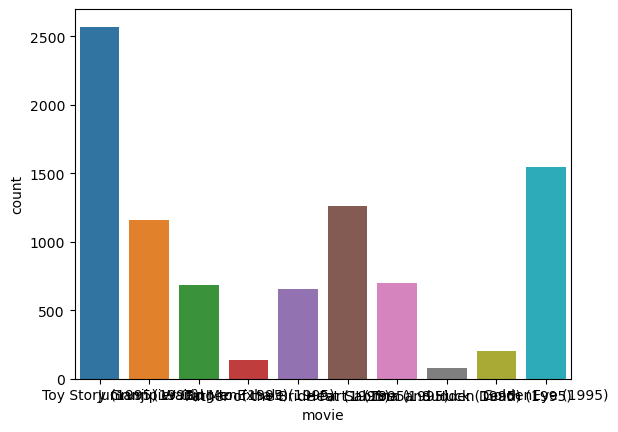

In [9]:
sns.countplot(df['movie'])

In [10]:
df['rating']

0       4.0
1       5.0
2       4.0
3       4.0
4       4.5
       ... 
8987    3.0
8988    1.0
8989    2.0
8990    3.0
8991    3.0
Name: rating, Length: 8992, dtype: float64

In [11]:
df['rating'].value_counts()

3.0    2736
4.0    2660
5.0    1394
3.5     679
2.0     542
4.5     374
2.5     277
1.0     212
1.5      61
0.5      57
Name: rating, dtype: int64

In [ ]:
#pivot table

In [12]:
df.head()

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5


In [13]:
pivot = df.pivot(index='userId', columns='movie',values='rating')
pivot

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7116,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
7117,NaN,3.0,4.0,5.0,NaN,3.0,1.0,NaN,4.0,NaN


In [14]:
pivot.fillna(0, inplace=True)

In [15]:
pivot

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7116,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
7117,0.0,3.0,4.0,5.0,0.0,3.0,1.0,0.0,4.0,0.0


In [16]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

In [ ]:
#Calculate the distance

In [17]:
distance = pairwise_distances(pivot, metric='cosine')

In [18]:
distance

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 4.46628429e-01],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        5.41168532e-01, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        5.41168532e-01, 0.00000000e+00, 3.77456983e-01],
       ...,
       [1.00000000e+00, 5.41168532e-01, 5.41168532e-01, ...,
        1.11022302e-16, 5.41168532e-01, 5.23929456e-01],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        5.41168532e-01, 0.00000000e+00, 3.77456983e-01],
       [4.46628429e-01, 1.00000000e+00, 3.77456983e-01, ...,
        5.23929456e-01, 3.77456983e-01, 1.11022302e-16]])

In [20]:
similarity =  1 - pairwise_distances(pivot, metric='cosine')
similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 1.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 1.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        1.        ]])

In [21]:
sim = pd.DataFrame(similarity)
sim

,0,1,2,3,4,5,6,7,8,9,...,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080
0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
4,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.658505,0.000000,0.000000,0.000000
4077,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,1.000000,0.345306,0.752577,0.468511
4078,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,1.000000,0.458831,0.476071
4079,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543


In [ ]:
#fill diagonal values

In [23]:
np.fill_diagonal(sim.values,0)

In [24]:
sim

,0,1,2,3,4,5,6,7,8,9,...,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080
0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
4,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658505,0.000000,0.000000,0.000000
4077,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,0.000000,0.345306,0.752577,0.468511
4078,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,0.000000,0.458831,0.476071
4079,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,0.000000,0.622543


In [ ]:
#Set data index and column names

In [25]:
sim.index = df.userId.unique()
sim.columns = df.userId.unique()

sim

,3,6,8,10,11,12,13,14,16,19,...,6975,6979,6993,7030,7031,7044,7070,7080,7087,7105
3,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
11,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658505,0.000000,0.000000,0.000000
7070,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,0.000000,0.345306,0.752577,0.468511
7080,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,0.000000,0.458831,0.476071
7087,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,0.000000,0.622543


In [ ]:
#extract all the similar users

In [27]:
sim.idxmax(1)

3         11
6        168
8         16
10      4047
11         3
        ... 
7044      80
7070    1808
7080     708
7087       8
7105    4110
Length: 4081, dtype: int64

In [28]:
df[(df['userId']==3) | (df['userId']==11)]

,userId,movie,rating
0,3,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5
7446,11,GoldenEye (1995),2.5


In [29]:
df[(df['userId']==7087) | (df['userId']==8)]

,userId,movie,rating
2,8,Toy Story (1995),4.0
3727,8,Grumpier Old Men (1995),5.0
5205,8,Heat (1995),3.0
7445,8,GoldenEye (1995),4.0
8987,7087,GoldenEye (1995),3.0
